In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from myupmask.upmask.dimred import pca_dimred
from myupmask.upmask.clustering import kmeans, hdbscan
from myupmask.upmask.spatialtest import sp_test_groups
from myupmask.data.loader import load_test_data

In [2]:
spatial_pos, data, labels, df = load_test_data()

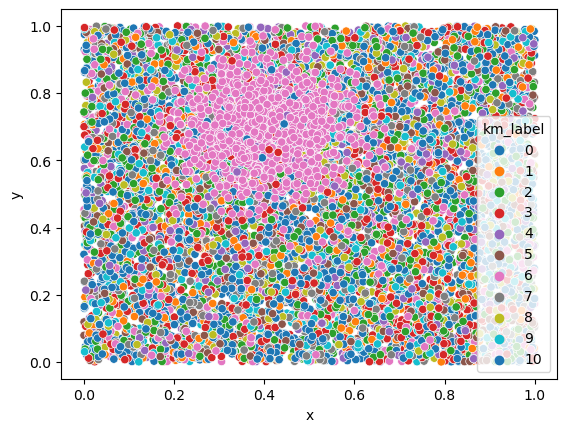

In [3]:
plabels = kmeans(data, n_clusters=11)
df["km_label"] = list(plabels)
sns.scatterplot(data=df, x="x", y="y", hue="km_label", palette="tab10");

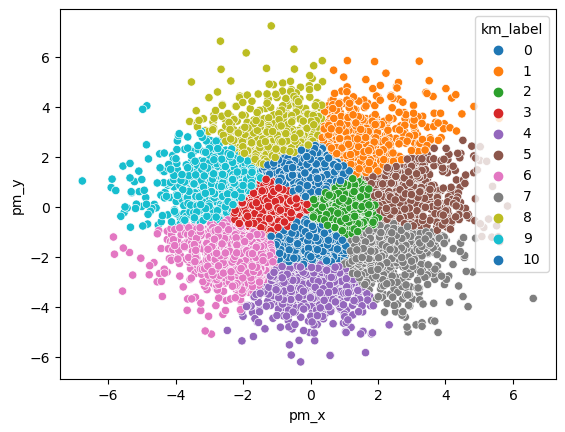

In [4]:
sns.scatterplot(data=df, x="pm_x", y="pm_y", hue="km_label", palette="tab10");

In [5]:
indxs = sp_test_groups(plabels, spatial_pos)

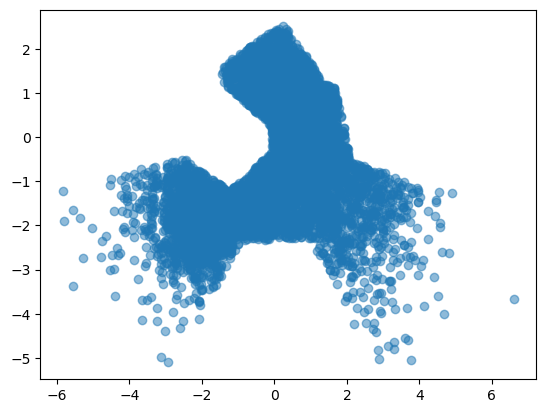

In [6]:
# Sobrevivientes
plt.scatter(data[indxs][:,0], data[indxs][:,1], alpha=0.5,)

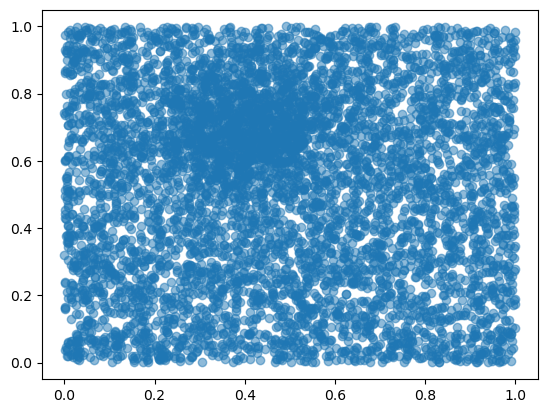

In [7]:
plt.scatter(spatial_pos[indxs][:,0], spatial_pos[indxs][:,1], alpha=0.5,)

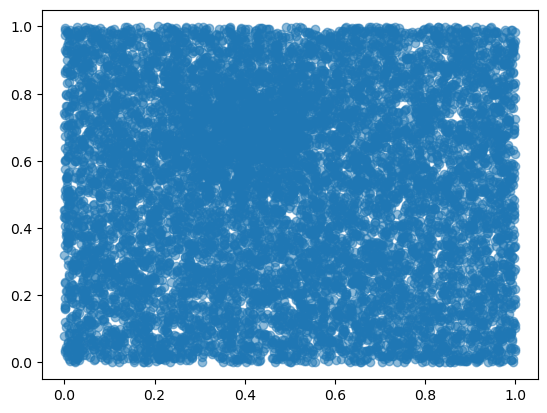

In [8]:
plt.scatter(spatial_pos[:,0], spatial_pos[:,1], alpha=0.5,)

In [9]:
new_data = data[indxs]
new_spatial_pos = spatial_pos[indxs]

In [10]:
new_plabels = kmeans(new_data, n_clusters=11)

In [11]:
indxs.shape

(6317,)

In [12]:
new_plabels.shape

(6317,)

In [13]:
df["label_2"] = -1
df["label_2"].iloc[indxs] = list(new_plabels)

/tmp/ipykernel_33055/1047154162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label_2"].iloc[indxs] = list(new_plabels)


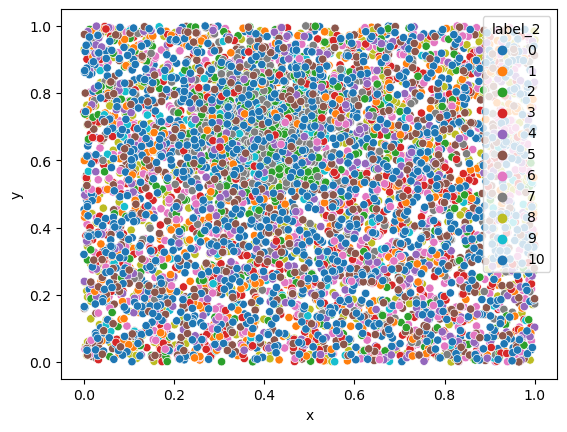

In [14]:

sns.scatterplot(data=df.loc[indxs], x="x", y="y", hue="label_2", palette="tab10");

<Axes: xlabel='pm_x', ylabel='pm_y'>

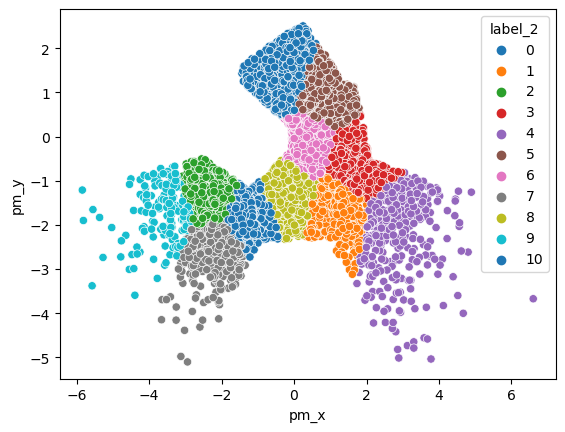

In [15]:
sns.scatterplot(data=df.loc[indxs], x="pm_x", y="pm_y", hue="label_2", palette="tab10")

In [16]:
indxs_2 = sp_test_groups(new_plabels, new_spatial_pos)

In [17]:
indxs_2.shape

(3979,)

# Primer intento de itarcion usando Kmeans

In [36]:
spatial_pos, data, labels, df = load_test_data()


ITERATIONS = 200
for i in range(ITERATIONS):
    plabels = kmeans(data, n_clusters=11)
    indxs = sp_test_groups(plabels, spatial_pos)
    data = data[indxs]
    spatial_pos = spatial_pos[indxs]

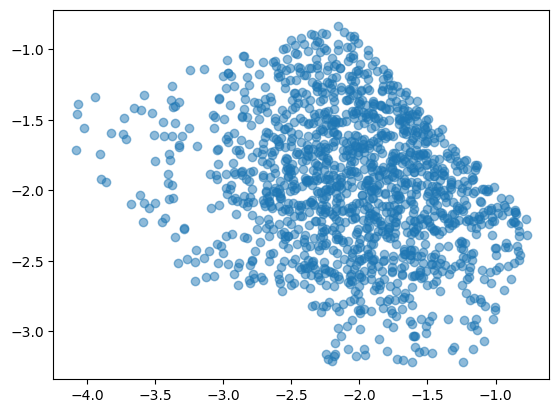

In [37]:
plt.scatter(data[:,0], data[:,1], alpha=0.5,)

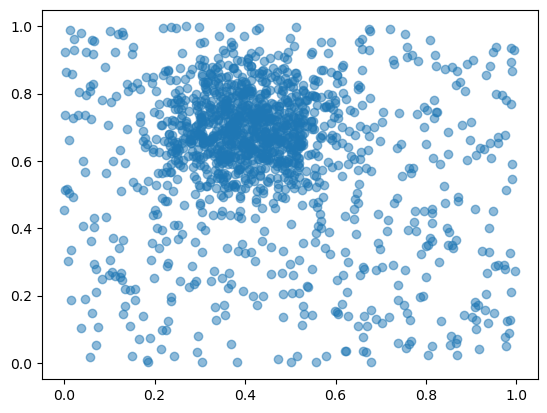

In [38]:
plt.scatter(spatial_pos[:,0], spatial_pos[:,1], alpha=0.5,)


# Intento 2 de iteracion usando HDBSCAN

i=0
(array([-1,  0,  1]), array([8088,  707, 2205]))
(2912,)


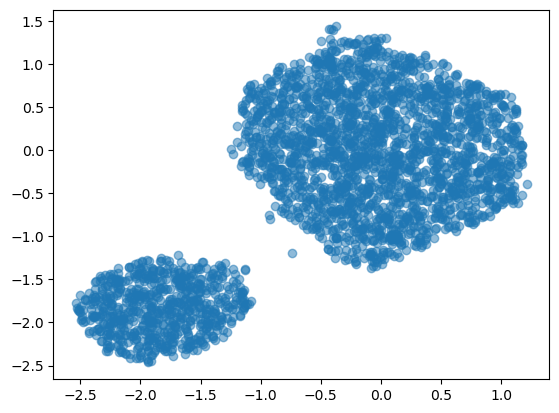

i=1
(array([-1,  0,  1]), array([  34,  698, 2180]))
(2878,)


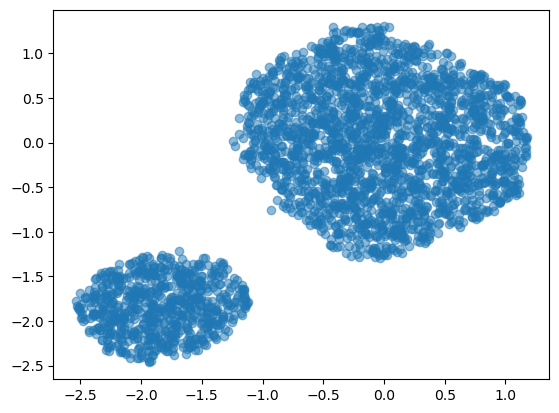

i=2
(array([-1,  0,  1]), array([  11,  693, 2174]))
(2867,)


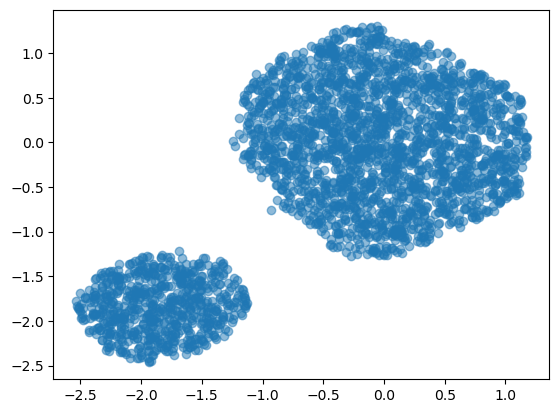

In [31]:
spatial_pos, data, labels, df = load_test_data()


ITERATIONS = 3
for i in range(ITERATIONS):
    print(f"{i=}")
    plabels = hdbscan(data, min_cluster_size=500)  # Un octavo de lo esperado
    print(np.unique(plabels, return_counts=True))
    indxs = sp_test_groups(plabels, spatial_pos)
    print(indxs.shape)
    data = data[indxs]
    spatial_pos = spatial_pos[indxs]
    plt.scatter(data[:,0], data[:,1], alpha=0.5,)
    plt.show()

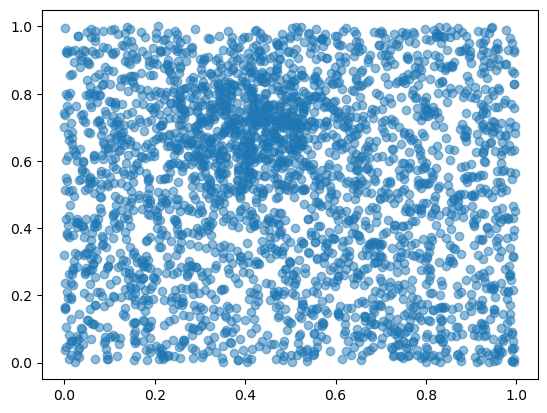

In [32]:
plt.scatter(spatial_pos[:,0], spatial_pos[:,1], alpha=0.5,)